# Introduction
This project has been conducted in the context of a fundamentals of AI training.
The objective of the project is to complete the [digit recognizer](https://www.kaggle.com/c/digit-recognizer) contest
created by [Kaggle](https://www.kaggle.com/).

In the context of the training we were asked to compare each of the following classification models: Naive Bayes, k-nearest neighbors, decision tree, random forest, support vector machines and the neural network.

## Evaluation
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.


# Dependencies

## Imports

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Constants

In [80]:
TRAIN_DATA_CSV_URI = "https://raw.githubusercontent.com/Lofaloa/digit-recognizer/main/data/train.csv"
TEST_DATA_CSV_URI = "https://raw.githubusercontent.com/Lofaloa/digit-recognizer/main/data/test.csv"

In [84]:
TRAIN_IMAGES = pd.read_csv(TRAIN_DATA_CSV_URI)
TEST_IMAGES = pd.read_csv(TEST_DATA_CSV_URI)

# Explore the data
The data files contain gray-scale images of hand-drawn digits, from zero through nine.

Kaggle provide us with three [files](https://www.kaggle.com/c/digit-recognizer/data):
- `train.csv`: 785 columns (28 x 28 pixels and a label). 
- `test.csv`: 784 columns (28 x 28 pixels)
- `sample_submission.csv`: self explanatory. We are allowed to submit a solution five times a day.


## Training data
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. ([source](https://www.kaggle.com/c/digit-recognizer/data)).

In [83]:
print(TRAIN_IMAGES.head())
print(f"Shape: {TRAIN_IMAGES.shape}")

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
Shape: (42000, 785)


## Test data
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

In [85]:
print(TEST_IMAGES.head())
print(f"Shape: {TEST_IMAGES.shape}")

   pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0       0       0       0       0  ...         0         0         0         0
1       0       0       0       0  ...         0         0         0         0
2       0       0       0       0  ...         0         0         0         0
3       0       0       0       0  ...         0         0         0         0
4       0       0       0       0  ...         0         0         0         0

[5 rows x 784 columns]
Shape: (28000, 784)


## Digits distribution

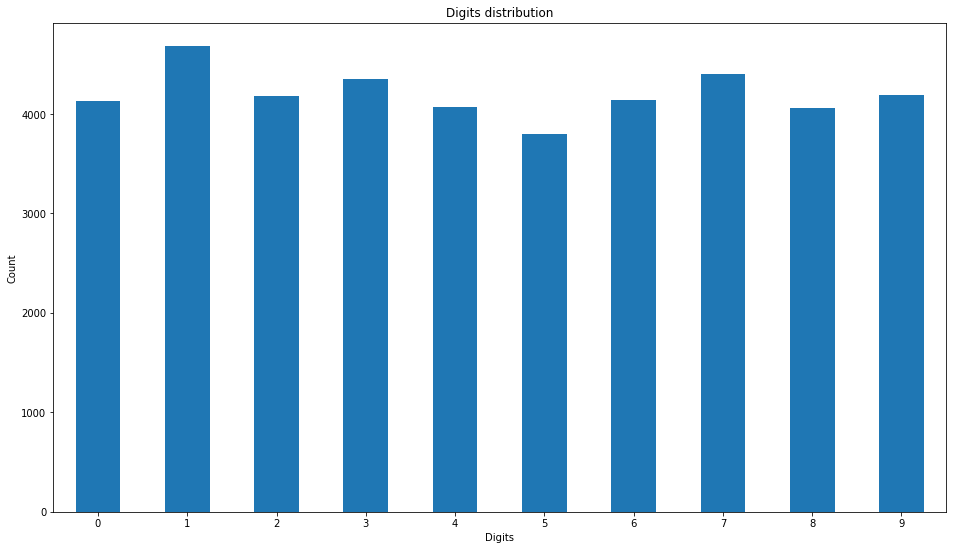

In [ ]:
TRAIN_IMAGES["label"]\
  .value_counts()\
  .sort_index()\
  .plot(
      kind="bar",
      title="Digits distribution",
      rot=0,
      xlabel="Digits",
      ylabel="Count",
      figsize=(16, 9)
  )

## Digit representation

In [97]:
print(TRAIN_IMAGES.iloc(0))

# plt.figure()
# plt.imshow(TRAIN_IMAGES.drop("label").to_numpy()[0])
# plt.colorbar()
# plt.grid(False)
# plt.show()

AttributeError: ignored

## First ten images for each digits
The samples are very different from each others as they have supposedly written by different poeple. The digits can be hard to read, even for humans.

The following code comes from another contestor [notebook](https://www.kaggle.com/dejavu23/mnist-sklearn-and-keras/notebook#Part-1-:-Exploring-the-Data).

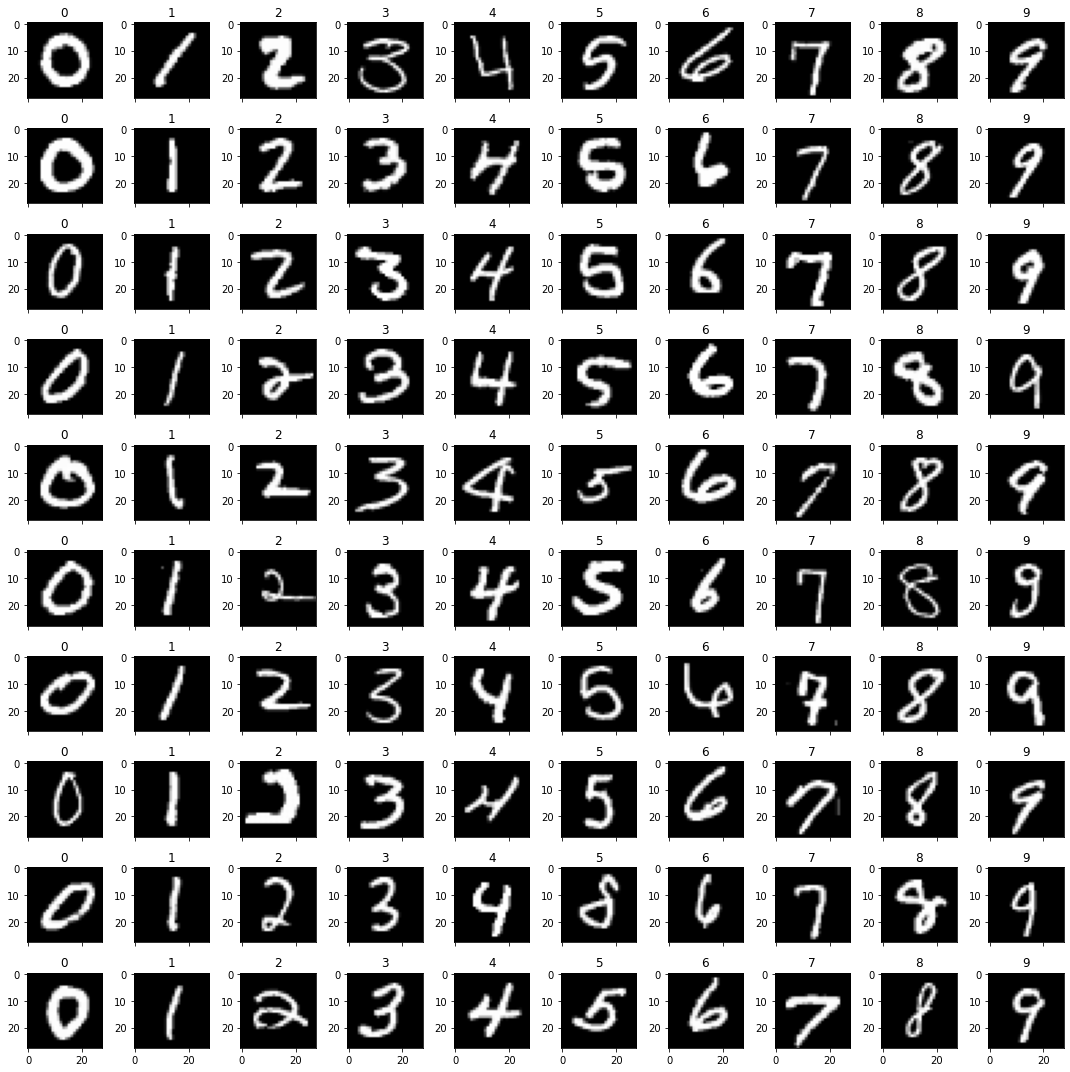

In [ ]:
labels = TRAIN_IMAGES["label"]
pixels = TRAIN_IMAGES.drop(["label"], axis=1)

indexes = []
for row in range(10):
    for digit in range(10):
        index = TRAIN_IMAGES[labels == digit].index[row]
        indexes.append(index) 

figure, axes = plt.subplots(nrows=10, ncols=10, sharex=True, figsize=(15, 15))
axes = axes.flatten()

for index, value in enumerate(indexes):
    image = pixels.iloc[value]
    image = image.values.reshape(-1,28,28,1)
    axes[index].imshow(image[0,:,:,0], cmap=plt.get_cmap('gray'))
    axes[index].set_title(labels[value])

plt.tight_layout() 

# Preprocess the data

Here the data is preprocessed in order to make the pixels range from 0 to 1.

In [ ]:
NORMALIZED_TRAIN_IMAGES = TRAIN_IMAGES / 255.0
NORMALIZED_TEST_IMAGES = TEST_IMAGES / 255.0

## Normalization

## Principal Components Analysis (P.C.A.)

# Classifiers